In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse

#### FETCHING DATA

In [2]:
xtrain = pd.read_csv("X_train.csv")
xtest = pd.read_csv("X_test.csv")
ytrain = pd.read_csv("Y_train.csv")

In [3]:
df = pd.concat([xtrain,ytrain["value"]],axis=1)
df.head()

,id,brand,year,age,engine_size,power,mileage,prev_owners,value
0,id_11042,bmw,2016,2,3500,272.0,4751.0,0,24350.0
1,id_7042,ford,2009,9,1400,96.0,59288.0,2,100.0
2,id_1420,vw,2014,4,3600,252.0,13387.0,0,15500.0
3,id_64357,ford,2012,6,2200,150.0,3194.0,0,5950.0
4,id_79541,kia,2011,7,1200,80.0,2645.0,0,4600.0


#### HANDLING MISSING VALUES

In [4]:
df.isnull().sum()

id             0
brand          0
year           0
age            0
engine_size    0
power          0
mileage        0
prev_owners    0
value          0
dtype: int64

In [5]:
xtest.isnull().sum()

id             0
brand          0
year           0
age            0
engine_size    0
power          0
mileage        0
prev_owners    0
dtype: int64

NO MISSING VALUES

#### DATA PREPROCESSING AND FEATURE ENGINEERING

In [6]:
df.shape

(70000, 9)

In [7]:
xtest.shape

(30000, 8)

In [8]:
len(df["id"].unique())

70000

In [9]:
#70000 unique values . Clearly no correlation with value. Drop the column
df= df[[x for x in df.columns if x!="id"]]
xtest= xtest[[x for x in xtest.columns if x!="id"]]
df.head()

,brand,year,age,engine_size,power,mileage,prev_owners,value
0,bmw,2016,2,3500,272.0,4751.0,0,24350.0
1,ford,2009,9,1400,96.0,59288.0,2,100.0
2,vw,2014,4,3600,252.0,13387.0,0,15500.0
3,ford,2012,6,2200,150.0,3194.0,0,5950.0
4,kia,2011,7,1200,80.0,2645.0,0,4600.0


In [10]:
len(df["brand"].unique())

5

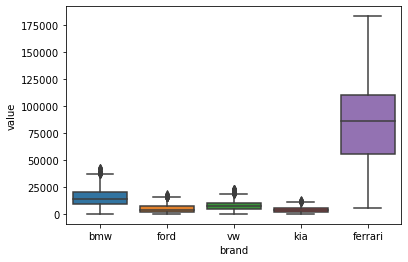

In [11]:
sns.boxplot(x="brand",y="value",data = df)

In [12]:
#the brand is an important feature in prediction of price

In [13]:
#next we have year

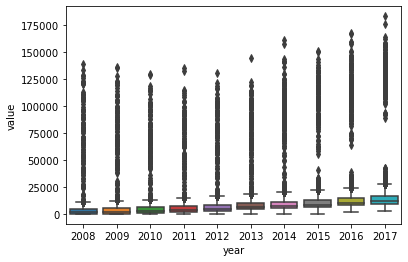

In [14]:
sns.boxplot(x="year",y="value",data=df)

In [15]:
#newer cars can be seen to have a higher price
#if we see, age and year features give the same info, therefore they will have a high correlation value
# let's check

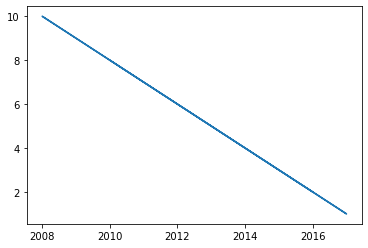

In [16]:
plt.plot(df["year"],df["age"])

In [17]:
# so we will remove one of these columns. let's remove year
df.drop(columns=["year"],inplace=True)
xtest.drop(columns=["year"],inplace=True)
df.head()

,brand,age,engine_size,power,mileage,prev_owners,value
0,bmw,2,3500,272.0,4751.0,0,24350.0
1,ford,9,1400,96.0,59288.0,2,100.0
2,vw,4,3600,252.0,13387.0,0,15500.0
3,ford,6,2200,150.0,3194.0,0,5950.0
4,kia,7,1200,80.0,2645.0,0,4600.0


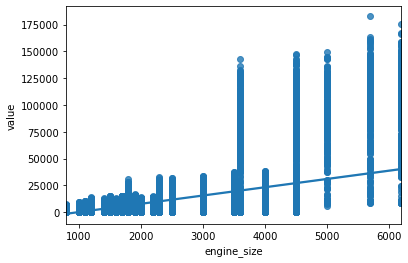

In [18]:
sns.regplot("engine_size","value",data=df)

In [19]:
# a week positive correlation

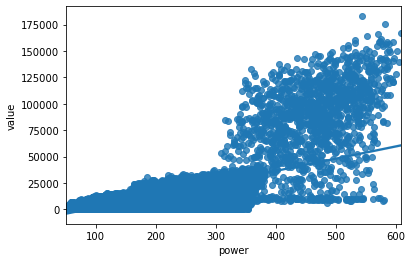

In [20]:
sns.regplot("power","value",data=df)

In [21]:
# a week positive correlation

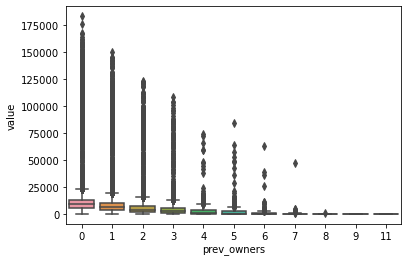

In [22]:
sns.boxplot("prev_owners","value",data=df)

In [23]:
#more the number of owners, lower the price

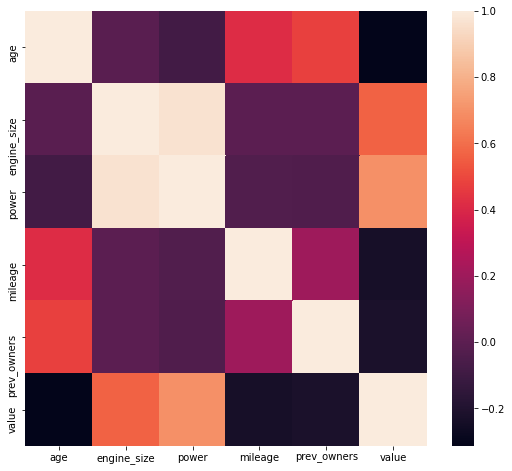

In [24]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

In [25]:
# can see a stron correlation between engine_size and power ,
# drop one of them . we will drop engine size
df.drop(columns=["engine_size"],inplace=True)
xtest.drop(columns=["engine_size"],inplace=True)
df.head()

,brand,age,power,mileage,prev_owners,value
0,bmw,2,272.0,4751.0,0,24350.0
1,ford,9,96.0,59288.0,2,100.0
2,vw,4,252.0,13387.0,0,15500.0
3,ford,6,150.0,3194.0,0,5950.0
4,kia,7,80.0,2645.0,0,4600.0


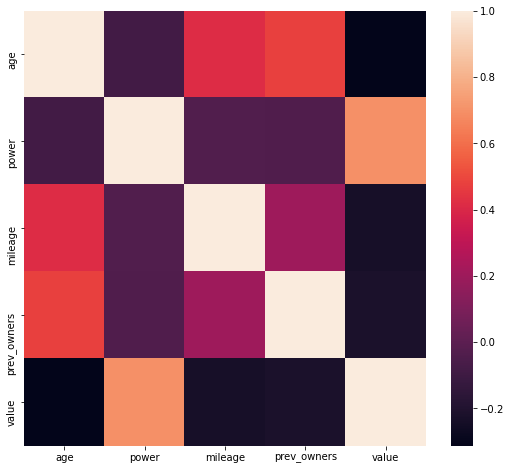

In [26]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

In [27]:
#lets get dummy variables for the categorical varibles
df = pd.concat([df,pd.get_dummies(df["brand"],drop_first=True)],axis=1)
df.drop(columns = ["brand"],inplace = True)
df.head()

,age,power,mileage,prev_owners,value,ferrari,ford,kia,vw
0,2,272.0,4751.0,0,24350.0,0,0,0,0
1,9,96.0,59288.0,2,100.0,0,1,0,0
2,4,252.0,13387.0,0,15500.0,0,0,0,1
3,6,150.0,3194.0,0,5950.0,0,1,0,0
4,7,80.0,2645.0,0,4600.0,0,0,1,0


In [28]:
#lets get dummy variables for the categorical varibles
xtest = pd.concat([xtest,pd.get_dummies(xtest["brand"],drop_first=True)],axis=1)
xtest.drop(columns = ["brand"],inplace = True)
xtest.head()

,age,power,mileage,prev_owners,ferrari,ford,kia,vw
0,5,128.0,54894.0,0,0,0,0,1
1,2,142.0,38248.0,2,0,1,0,0
2,9,474.0,151922.0,2,1,0,0,0
3,6,124.0,27453.0,0,0,0,0,1
4,3,78.0,36424.0,0,0,0,1,0


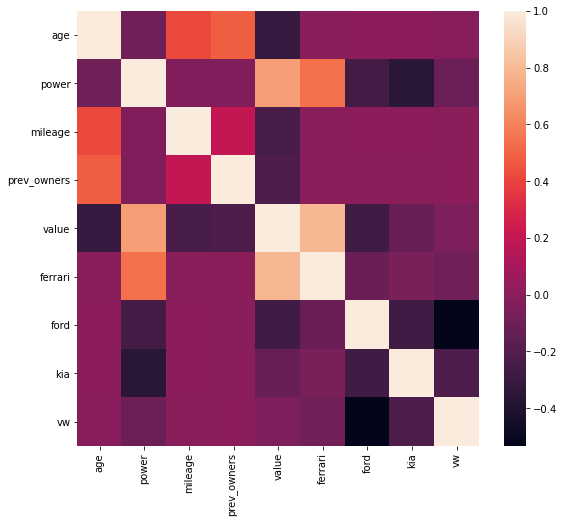

In [29]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr())

#### FEATURE SCALING

In [30]:
ytrain = df["value"]
xtrain = df[[x for x in df.columns if x!="value"]]
xtrain

,age,power,mileage,prev_owners,ferrari,ford,kia,vw
0,2,272.0,4751.0,0,0,0,0,0
1,9,96.0,59288.0,2,0,1,0,0
2,4,252.0,13387.0,0,0,0,0,1
3,6,150.0,3194.0,0,0,1,0,0
4,7,80.0,2645.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
69995,5,259.0,20600.0,0,0,0,0,0
69996,9,70.0,91751.0,2,0,0,1,0
69997,10,257.0,57373.0,4,0,0,0,0
69998,6,127.0,46493.0,2,0,1,0,0


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms = MinMaxScaler()

In [33]:
xtrain = mms.fit_transform(xtrain)

In [34]:
xtest = mms.transform(xtest)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(xtrain,ytrain,test_size = 0.2,random_state=2)

#### FITTING A MODEL

1) LINEAR MODEL

Mean Squared Error  27868892.375998124


([0, 1], <a list of 2 Text major ticklabel objects>)

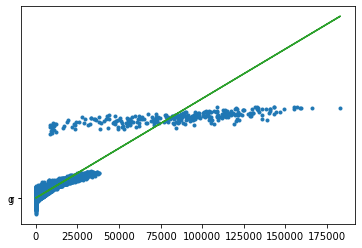

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
ypred = lr.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

In [38]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Mean Squared Error  162287911.61326158


([0, 1], <a list of 2 Text major ticklabel objects>)

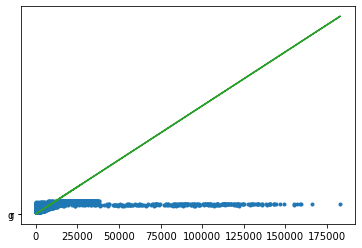

In [40]:
ypred = svr.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

Mean Squared Error  4086299.262726153


([0, 1], <a list of 2 Text major ticklabel objects>)

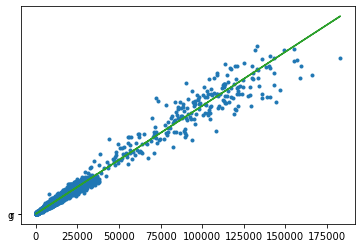

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
ypred = rfr.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

Mean Squared Error  3983567.7350672325


([0, 1], <a list of 2 Text major ticklabel objects>)

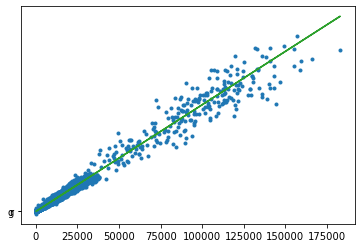

In [50]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
ypred = xgb.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

Mean Squared Error  3391417.434069758


([0, 1], <a list of 2 Text major ticklabel objects>)

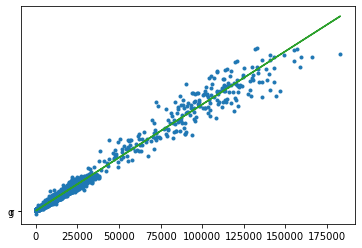

In [52]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(X_train,Y_train)
ypred = lgb.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

Mean Squared Error  26047155.858605813


([0, 1], <a list of 2 Text major ticklabel objects>)

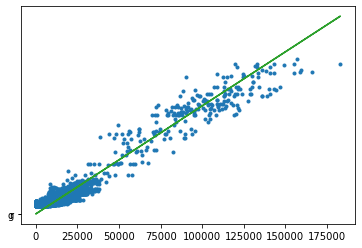

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train,Y_train)
ypred = abr.predict(X_test)
print("Mean Squared Error ",mse(Y_test,ypred))
plt.plot(Y_test,ypred,'.','r')
plt.plot(Y_test,Y_test,'-','g')
plt.yticks(ticks=None)

In [62]:
lgb.fit(xtrain,ytrain)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
ypred = lgb.predict(xtest)

In [70]:
res = pd.DataFrame({'id':list(id),'values':list(ypred)})

In [71]:
res.to_csv("result_submission.csv",index=False)